In [1]:
from dataframe2graph import data2graph, add_node_attrs
from add_acpt_reqs import add_accept_info, add_request_info
from sybil_prob import cal_sybil_prob
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Input data
---

Must have 

| data                    | column                           |
| :---------------------- | :------------------------------: |
| edge info (dataframe)   | 'source', 'target', 'acceptance' |
| node info (dataframe)   | 'node', 'label'                  |
| confidence prior (dict) | {node: {$\pi, \sigma, \phi$}}    |

where $\pi, \sigma, \phi$ are prior parameters to control the assumptions of each node.

---

### Use networkx to build graph

In [2]:
edge_info = pd.DataFrame({'source': ['B', 'D', 'A', 'C', 'D', 'E', 'F'], 
                         'target': ['A', 'A', 'B', 'B', 'B', 'B', 'C'],
                         'accept': [1, 0, 1, 1, 1, 0, 0]})

node_info = pd.DataFrame({'node': ['A', 'B', 'C', 'D', 'E', 'F'],
                          'label': ['real', 'fake', 'None', 'real', 'fake', 'real']})

confidence_prior = {'A': {'pi': 0.5, 'sigma': 1, 'phi': 1}, 
                    'B': {'pi': 0.5, 'sigma': 1, 'phi': 1}, 
                    'C': {'pi': 0.5, 'sigma': 1, 'phi': 1}, 
                    'D': {'pi': 0.5, 'sigma': 1, 'phi': 1},
                    'E': {'pi': 0.5, 'sigma': 1, 'phi': 1},
                    'F': {'pi': 0.5, 'sigma': 1, 'phi': 1},}

graph = data2graph(edge_info)
graph = add_node_attrs(graph, node_info)

### Calculate accept info and request info for each node

In [3]:
graph = add_accept_info(graph, confidence_prior)
graph = add_request_info(graph, confidence_prior)

In [4]:
sybil_dict = cal_sybil_prob(graph, confidence_prior)

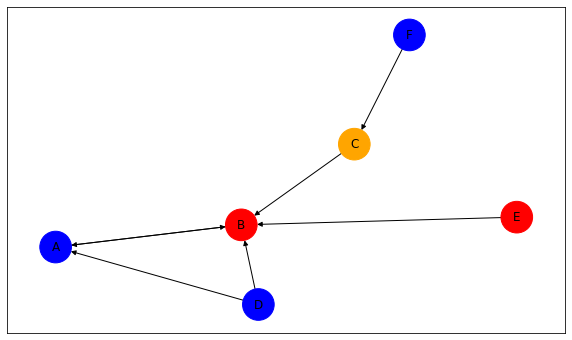

In [5]:
pos = nx.spring_layout(graph)

node_color = []
for node, label in graph.nodes.data('label'):
    if label == 'fake':             # sybil account
        node_color.append('red')
    elif label == 'None':           # new account
        node_color.append('orange')
    else:                           # real account
        node_color.append('blue')

plt.figure(figsize=(10, 6))
nx.draw_networkx(
    graph, with_labels=True, node_size=1000, node_color=node_color, pos=pos
)

In [6]:
# sybil rate
sybil_dict

{'B': 0.9302325581395349,
 'A': 0.22727272727272727,
 'D': 0.15784361340456532,
 'C': 0.22727272727272727,
 'E': 0.625,
 'F': 0.5}